In [31]:
# Load library
import numpy as np
import pandas as pd
import csv

from collections import Counter

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt

df = pandas.read_csv("datagun.csv")
x = df["n_killed"]
y = df["Engineering"]


def group_lower_ranking_values(column):
    pie_counts = pie_raw.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = pie_raw.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped

pie_sources = group_lower_ranking_values('Source')
pie_flavors = group_lower_ranking_values('FoodCode')
 

source_labels = pie_sources.FoodCode.sort_values().index
source_counts = pie_sources.FoodCode.sort_values()

flavor_labels = pie_flavors.Source.sort_values().index
flavor_counts = pie_flavors.Source.sort_values()

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='Source of Pies')

source_pie = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.subplot(the_grid[0, 0], aspect=1, title='Selected Flavors of Pies')

flavor_pie = plt.pie(flavor_counts,labels=flavor_labels, autopct='%.0f%%', shadow=True, colors=colors)

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)


plt.show()
  

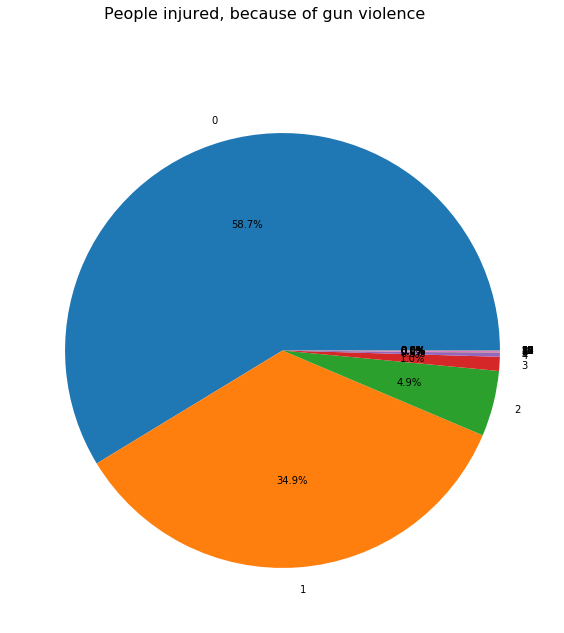

In [55]:
df = pd.read_csv("datagun.csv")

amount_k = []
# appends all the cities in dataset to list
for amount in df['n_injured']:
    amount = str(amount)
    amount_k.append(amount)
cnt = dict(Counter(amount_k))

amount_list = []
number_list = []
for element in cnt:
    number = cnt[element]
    number_list.append(number)
    amount_list.append(element)
    
labels = amount_list
fracs = number_list

explode = (0, 0.05, 0, 0)

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')

plt.suptitle('People injured, because of gun violence', fontsize=16)

plt.show()

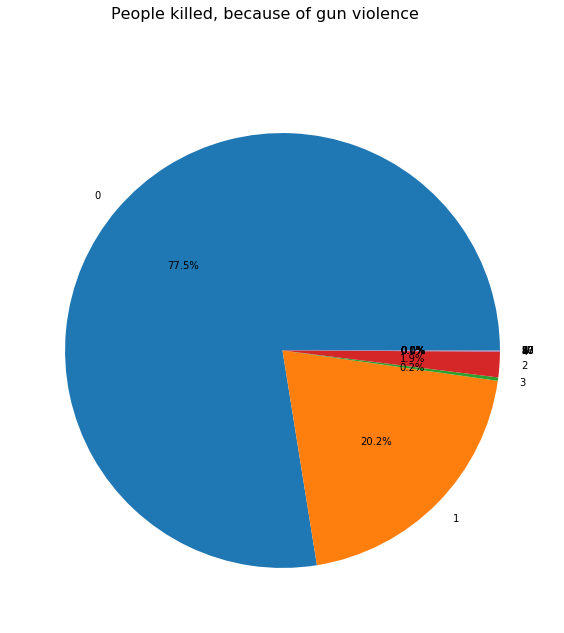

In [56]:
df = pd.read_csv("datagun.csv")

amount_k = []
# appends all the cities in dataset to list
for amount in df['n_killed']:
    amount = str(amount)
    amount_k.append(amount)
cnt = dict(Counter(amount_k))

amount_list = []
number_list = []
for element in cnt:
    number = cnt[element]
    number_list.append(number)
    amount_list.append(element)
    
labels = amount_list
fracs = number_list

explode = (0, 0.05, 0, 0)

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')

plt.suptitle('People killed, because of gun violence', fontsize=16)

plt.show()